In [71]:
import pandas as pd
import numpy as np
import ffn
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/Users/nhacheat/anaconda3/lib/python3.8/site-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [139]:
start = '2016-01-01'
end = '2020-10-01'

In [140]:
tickers = ['VN30INDEX','REE','HCM','PNJ','VCB']
df = (pd.concat(
    [pd.read_csv(f'data/{ticker}.csv',index_col='date',parse_dates=True)['adj_close'].rename(ticker) for ticker in tickers]
    ,axis=1,sort=True))[start:].dropna()

In [141]:
market = df['VN30INDEX']
portf = df.loc[:,df.columns != 'VN30INDEX']
weight = np.array([1/len(portf.columns)]*len(portf.columns))
weight

array([0.25, 0.25, 0.25, 0.25])

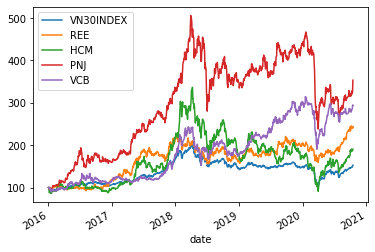

In [142]:
df.rebase().plot()

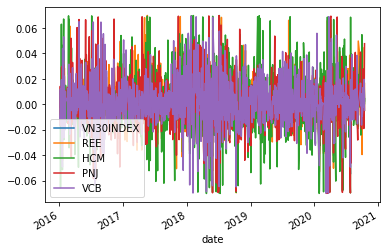

In [143]:
returns = df.pct_change().dropna()
returns.plot()

In [144]:
print(stats.describe(returns))

DescribeResult(nobs=1174, minmax=(array([-0.06354295, -0.06954944, -0.07010429, -0.07000298, -0.0699187 ]), array([0.05160595, 0.06990654, 0.06984127, 0.06976314, 0.06941082])), mean=array([0.00042633, 0.00090011, 0.00085868, 0.00128262, 0.00109348]), variance=array([0.00012918, 0.00029001, 0.00062208, 0.00041485, 0.00035223]), skewness=array([-0.83053808,  0.18205959,  0.03664862,  0.00766734,  0.01217271]), kurtosis=array([4.60378243, 2.39371471, 1.06893971, 2.12832586, 2.37349715]))


In [145]:
mean = np.mean(returns)
std = np.std(returns)
min = np.min(returns)
max = np.max(returns)

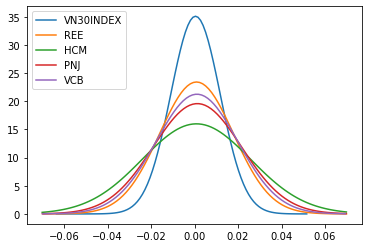

In [146]:
x = np.linspace(min,max,100)
plt.plot(x,norm.pdf(x,mean,std))
plt.legend(returns.columns,loc = 'upper left')

In [147]:
perf = df.calc_stats()
perf.display()

Stat                 VN30INDEX    REE         HCM         PNJ         VCB
-------------------  -----------  ----------  ----------  ----------  ----------
Start                2016-01-04   2016-01-04  2016-01-04  2016-01-04  2016-01-04
End                  2020-10-16   2020-10-16  2020-10-16  2020-10-16  2020-10-16
Risk-free rate       0.00%        0.00%       0.00%       0.00%       0.00%

Total Return         52.84%       142.71%     90.25%      253.22%     193.51%
Daily Sharpe         0.60         0.84        0.55        1.00        0.92
Daily Sortino        0.89         1.48        0.93        1.70        1.58
CAGR                 9.27%        20.37%      14.39%      30.19%      25.25%
Max Drawdown         -48.14%      -29.60%     -72.92%     -52.95%     -39.47%
Calmar Ratio         0.19         0.69        0.20        0.57        0.64

MTD                  5.01%        3.48%       6.90%       11.82%      4.88%
3m                   9.97%        25.68%      16.93%      12.56%      5

In [148]:
portf

,REE,HCM,PNJ,VCB
date,,,,
2016-01-04,17.14,11.80,19.28,30.05
2016-01-05,16.86,11.61,18.97,29.56
2016-01-06,16.93,11.41,19.24,29.91
2016-01-07,16.79,10.66,19.19,29.56
2016-01-08,16.52,10.35,19.24,29.35
...,...,...,...,...
2020-10-12,41.70,22.15,62.00,85.90
2020-10-13,41.65,22.00,62.50,86.50
2020-10-14,41.10,22.35,62.90,88.20


In [152]:
pf_prices = weight*portf
portf['pf'] = [weight*portf].sum(axis=1)
portf['2016-01-30']

ValueError: Unable to coerce to Series, length must be 5: given 4

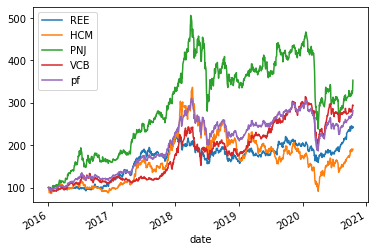

In [153]:
portf.rebase().plot()

In [120]:
porf_returns = portf.pct_change().dropna()

In [121]:
porf_returns

,REE,HCM,PNJ,VCB,pf
date,,,,,
2016-01-05,-0.016336,-0.016102,-0.016079,-0.016306,-0.016226
2016-01-06,0.004152,-0.017227,0.014233,0.011840,0.006364
2016-01-07,-0.008269,-0.065732,-0.002599,-0.011702,-0.016647
2016-01-08,-0.016081,-0.029081,0.002606,-0.007104,-0.009711
2016-01-11,0.000000,0.011594,-0.016112,-0.007155,-0.005301
...,...,...,...,...,...
2020-10-12,-0.007143,-0.017738,-0.018987,0.012972,-0.003764
2020-10-13,-0.001199,-0.006772,0.008065,0.006985,0.004250
2020-10-14,-0.013205,0.015909,0.006400,0.019653,0.008935


In [127]:
comp = pd.concat([df['VN30INDEX'],portf['pf']],axis=1)
#comp = returns['VN30INDEX'].join(porf_returns['pf'],how='inner')
#returns['VN30INDEX'].name

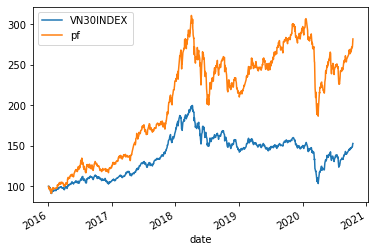

In [129]:
comp.rebase().plot()

In [132]:
portf_monthly = portf.resample('M').nearest()
portf_monthly

,REE,HCM,PNJ,VCB,pf
date,,,,,
2016-01-31,17.20,10.86,19.96,28.31,19.0825
2016-02-29,17.40,12.71,20.27,28.52,19.7250
2016-03-31,17.12,11.49,21.53,28.45,19.6475
2016-04-30,16.76,11.45,25.79,31.99,21.4975
2016-05-31,16.91,12.79,29.15,32.48,22.8325
2016-06-30,16.74,12.14,35.07,32.90,24.2125
2016-07-31,16.50,12.55,28.70,36.86,23.6525
2016-08-31,16.42,11.73,32.11,37.56,24.4550
2016-09-30,17.64,11.94,34.16,36.69,25.1075
